:# Projeto 1 de IF697 - Introdução a Ciência de Dados


*   Alunos: André Valença e Pedro Basílio
*   Professor: Luciano Barbosa
*   Documentação: https://github.com/ProfLuciano/cd/blob/gh-pages/slides/projeto1.pdf



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Coleta de dados

In [4]:
# Importando database do site da Associação Metropolitana de Ciclistas do Recife - AMECICLO

from urllib.request import urlopen
import json
url = "https://raw.githubusercontent.com/Ameciclo/perfil_do_ciclista/master/src/seed/seed.json"
response = urlopen(url)
data_json = json.loads(response.read())
l = []
for d in data_json:
  l.append(d["data"])

ciclistas = pd.DataFrame(l)

In [5]:
ciclistas.head(10)

,age,age_standard,biggest_issue,biggest_need,collisions,color_race,days_usage,distance_time,gender,job,motivation_to_continue,motivation_to_start,neighborhood_destiny,neighborhood_living,neighborhood_origin,schooling,transport_combination,wage_standard,years_using
0,43,de 1 a 2 Salários Mínimos,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 1, 'school': 0, 'shopping': 0, 'to...",20.0,Masculino,Encanador,É mais rápido e prático,É mais rápido e prático,Boa Viagem,Imbiribeira,Imbiribeira,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",2000,entre 4 e 5 anos
1,32,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais segurança pública,Sim,Parda,"{'leisure': 1, 'school': 2, 'shopping': 0, 'to...",80.0,Masculino,Vendedor(a),É mais rápido e prático,É mais barato,Alto Dois Carneiros (Jaboatão Dos Guararapes),Alto Dois Carneiros (Jaboatão Dos Guararapes),Boa Viagem,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",2000,entre 4 e 5 anos
2,47,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 0, 'school': 6, 'shopping': 0, 'to...",30.0,Masculino,Vendedor Ambulante,É mais barato,É mais barato,Boa Viagem,Boa Viagem,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",1000,entre 1 e 2 anos
3,20,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Parda,"{'leisure': 7, 'school': 2, 'shopping': 5, 'to...",10.0,Masculino,Soldado Do Exército,É mais rápido e prático,É mais rápido e prático,Cavaleiro (Jaboatão Dos Guararapes),Cavaleiro (Jaboatão Dos Guararapes),Pina,Ensino Médio (Segundo Grau),"{'transportation': 'Ônibus', 'yes_no': True}",1000,mais de 5 anos
4,53,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Preta,"{'leisure': 0, 'school': 1, 'shopping': 0, 'to...",30.0,Masculino,Pedreiro / Pintor,É mais rápido e prático,É mais rápido e prático,Afogados,Afogados,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",950,mais de 5 anos
5,24,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Branca,"{'leisure': 1, 'school': 4, 'shopping': 0, 'to...",60.0,Masculino,Encanador,É mais barato,É mais barato,San Martin,San Martin,Boa Viagem,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",1200,mais de 5 anos
6,53,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Branca,"{'leisure': 1, 'school': 1, 'shopping': 0, 'to...",40.0,Masculino,Chefe De Cozinha,É mais barato,É mais rápido e prático,Afogados,Afogados,Boa Viagem,Ensino Médio (Segundo Grau),"{'transportation': '', 'yes_no': False}",2650,mais de 5 anos
7,41,de 1 a 2 Salários Mínimos,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 2, 'school': 0, 'shopping': 0, 'to...",20.0,Masculino,Ajudante De Pedreiro,É mais rápido e prático,É mais barato,Imbiribeira,Imbiribeira,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",940,mais de 5 anos
8,28,de 6 a 10 Salários Mínimos,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Sim,Parda,"{'leisure': 1, 'school': 2, 'shopping': 0, 'to...",25.0,Masculino,Representante Comercial,É mais saudável,É mais saudável,Boa Viagem,Ipsep,Ipsep,Ensino Médio (Segundo Grau),"{'transportation': '', 'yes_no': False}",7500,entre 2 e 3 anos
9,24,de 1 a 2 Salários Mínimos,Falta de segurança pública,Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 0, 'school': 0, 'shopping': 2, 'to...",30.0,Masculino,Caixa,É mais rápido e prático,É mais saudável,Boa Viagem,Ipsep,Ipsep,Ens

In [6]:
ciclistas.dtypes

age                         int64
age_standard               object
biggest_issue              object
biggest_need               object
collisions                 object
color_race                 object
days_usage                 object
distance_time             float64
gender                     object
job                        object
motivation_to_continue     object
motivation_to_start        object
neighborhood_destiny       object
neighborhood_living        object
neighborhood_origin        object
schooling                  object
transport_combination      object
wage_standard              object
years_using                object
dtype: object

In [7]:
ciclistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     500 non-null    int64  
 1   age_standard            500 non-null    object 
 2   biggest_issue           500 non-null    object 
 3   biggest_need            500 non-null    object 
 4   collisions              500 non-null    object 
 5   color_race              500 non-null    object 
 6   days_usage              500 non-null    object 
 7   distance_time           498 non-null    float64
 8   gender                  500 non-null    object 
 9   job                     500 non-null    object 
 10  motivation_to_continue  500 non-null    object 
 11  motivation_to_start     500 non-null    object 
 12  neighborhood_destiny    500 non-null    object 
 13  neighborhood_living     500 non-null    object 
 14  neighborhood_origin     500 non-null    ob

In [8]:
ciclistas.shape

(500, 19)

## 2. Pré-processamento de dados

### Definição de tipos

In [9]:
# Alguns dados do salário estão em formatos diferentes

for c in ciclistas["wage_standard"]:
  if not type(c) is int:
    print(c)
    print(type(c))

1 salário
<class 'str'>
1 salário
<class 'str'>
Desempregado
<class 'str'>
1 salário
<class 'str'>
Sem renda
<class 'str'>
Sem renda
<class 'str'>
Sal. mínimo
<class 'str'>
Sem renda
<class 'str'>
Sem renda
<class 'str'>
Sem renda
<class 'str'>
Sal. Mínimo
<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>
-
<class 'str'>
-
<class 'str'>
-
<class 'str'>
-
<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>

<class 'str'>


In [10]:
# Dados inconsistentes. Removendo para transformar todos para int

ciclistas.loc[(ciclistas["wage_standard"] == "1 salário") | (ciclistas["wage_standard"] == "Sal. Mínimo") | (ciclistas["wage_standard"] == "Sal. mínimo"), "wage_standard"] = 1200
ciclistas.loc[(ciclistas["wage_standard"] == "Desempregado") | (ciclistas["wage_standard"] == "Sem renda"), "wage_standard"] = 0

# Dados inválidos

ciclistas = ciclistas[(ciclistas["wage_standard"] != "") & (ciclistas["wage_standard"] != "-")]

In [11]:
ciclistas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     476 non-null    int64  
 1   age_standard            476 non-null    object 
 2   biggest_issue           476 non-null    object 
 3   biggest_need            476 non-null    object 
 4   collisions              476 non-null    object 
 5   color_race              476 non-null    object 
 6   days_usage              476 non-null    object 
 7   distance_time           474 non-null    float64
 8   gender                  476 non-null    object 
 9   job                     476 non-null    object 
 10  motivation_to_continue  476 non-null    object 
 11  motivation_to_start     476 non-null    object 
 12  neighborhood_destiny    476 non-null    object 
 13  neighborhood_living     476 non-null    object 
 14  neighborhood_origin     476 non-null    ob

In [12]:
# categorização

ciclistas["biggest_issue"] = ciclistas["biggest_issue"].astype("category")
ciclistas["biggest_need"] = ciclistas["biggest_need"].astype("category")
ciclistas["gender"] = ciclistas["gender"].astype("category")
ciclistas["motivation_to_continue"] = ciclistas["motivation_to_continue"].astype("category")
ciclistas["motivation_to_start"] = ciclistas["motivation_to_start"].astype("category")
ciclistas["schooling"] = ciclistas["schooling"].astype("category")
ciclistas["wage_standard"] = ciclistas["wage_standard"].astype("int")

In [15]:
# removendo irrelevantes

# ciclistas = ciclistas.drop(["age_standard", "collisions", "color_race", "days_usage", "job", "neighborhood_destiny", "neighborhood_origin", "schooling", "transport_combination", "years_using"], axis="columns")

# André, acredito que as informações de colisão, raça, e distância podem ser relevantes para uma análise futura.
ciclistas = ciclistas.drop(["age_standard"], axis="columns")

In [16]:
ciclistas.head()

,age,biggest_issue,biggest_need,collisions,color_race,days_usage,distance_time,gender,job,motivation_to_continue,motivation_to_start,neighborhood_destiny,neighborhood_living,neighborhood_origin,schooling,transport_combination,wage_standard,years_using
0,43,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 1, 'school': 0, 'shopping': 0, 'to...",20.0,Masculino,Encanador,É mais rápido e prático,É mais rápido e prático,Boa Viagem,Imbiribeira,Imbiribeira,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",2000,entre 4 e 5 anos
1,32,Falta de segurança no trânsito,Mais segurança pública,Sim,Parda,"{'leisure': 1, 'school': 2, 'shopping': 0, 'to...",80.0,Masculino,Vendedor(a),É mais rápido e prático,É mais barato,Alto Dois Carneiros (Jaboatão Dos Guararapes),Alto Dois Carneiros (Jaboatão Dos Guararapes),Boa Viagem,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",2000,entre 4 e 5 anos
2,47,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 0, 'school': 6, 'shopping': 0, 'to...",30.0,Masculino,Vendedor Ambulante,É mais barato,É mais barato,Boa Viagem,Boa Viagem,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",1000,entre 1 e 2 anos
3,20,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Parda,"{'leisure': 7, 'school': 2, 'shopping': 5, 'to...",10.0,Masculino,Soldado Do Exército,É mais rápido e prático,É mais rápido e prático,Cavaleiro (Jaboatão Dos Guararapes),Cavaleiro (Jaboatão Dos Guararapes),Pina,Ensino Médio (Segundo Grau),"{'transportation': 'Ônibus', 'yes_no': True}",1000,mais de 5 anos
4,53,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Preta,"{'leisure': 0, 'school': 1, 'shopping': 0, 'to...",30.0,Masculino,Pedreiro / Pintor,É mais rápido e prático,É mais rápido e prático,Afogados,Afogados,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",950,mais de 5 anos


In [18]:
for c in ciclistas["days_usage"]:
  if not type(c) is int:
    print(c)

{'leisure': 1, 'school': 0, 'shopping': 0, 'total': 5, 'working': 5}
{'leisure': 1, 'school': 2, 'shopping': 0, 'total': 5, 'working': 5}
{'leisure': 0, 'school': 6, 'shopping': 0, 'total': 6, 'working': 6}
{'leisure': 7, 'school': 2, 'shopping': 5, 'total': 7, 'working': 5}
{'leisure': 0, 'school': 1, 'shopping': 0, 'total': 7, 'working': 7}
{'leisure': 1, 'school': 4, 'shopping': 0, 'total': 5, 'working': 5}
{'leisure': 1, 'school': 1, 'shopping': 0, 'total': 5, 'working': 5}
{'leisure': 2, 'school': 0, 'shopping': 0, 'total': 5, 'working': 5}
{'leisure': 1, 'school': 2, 'shopping': 0, 'total': 5, 'working': 5}
{'leisure': 0, 'school': 0, 'shopping': 2, 'total': 4, 'working': 4}
{'leisure': 2, 'school': 3, 'shopping': 0, 'total': 6, 'working': 5}
{'leisure': 2, 'school': 1, 'shopping': 5, 'total': 7, 'working': 6}
{'leisure': 5, 'school': 5, 'shopping': 0, 'total': 5, 'working': 0}
{'leisure': 0, 'school': 1, 'shopping': 0, 'total': 7, 'working': 7}
{'leisure': 1, 'school': 5, 'shopp

In [20]:
#Dividindo a inforção em várias colunas para conseguir medir:
ciclistas['days_usage'].str.split(',', expand=True)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
495,NaN
496,NaN
497,NaN
498,NaN


In [21]:
ciclistas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     476 non-null    int64   
 1   biggest_issue           476 non-null    category
 2   biggest_need            476 non-null    category
 3   collisions              476 non-null    object  
 4   color_race              476 non-null    object  
 5   days_usage              476 non-null    object  
 6   distance_time           474 non-null    float64 
 7   gender                  476 non-null    category
 8   job                     476 non-null    object  
 9   motivation_to_continue  476 non-null    category
 10  motivation_to_start     476 non-null    category
 11  neighborhood_destiny    476 non-null    object  
 12  neighborhood_living     476 non-null    object  
 13  neighborhood_origin     476 non-null    object  
 14  schooling               47

### Tratamentos de dados ausentes

In [ ]:
# Tirando linhas com valores nulos

ciclistas = ciclistas.dropna()
ciclistas.count()

age                       474
biggest_issue             474
biggest_need              474
distance_time             474
gender                    474
motivation_to_continue    474
motivation_to_start       474
neighborhood_living       474
wage_standard             474
dtype: int64

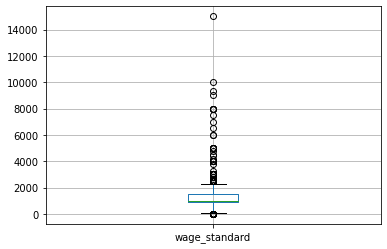

In [ ]:
ciclistas.boxplot(column="wage_standard")

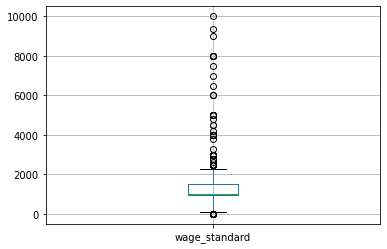

In [ ]:
# removendo outlier
ciclistas = ciclistas[ciclistas["wage_standard"] < 12000]
ciclistas.boxplot(column="wage_standard")

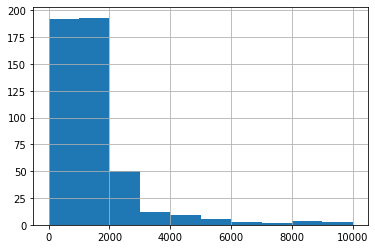

In [ ]:
# Aqui, percebe-se que o grosso dos ciclistas ganha abaixo de 2000.
# E que, pela curva logarítmica, quanto maior o salário, menos o pedala

ciclistas["wage_standard"].hist()

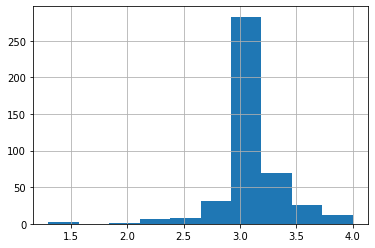

In [ ]:
# Ao aplicar o log, vê-se melhor que
# o grosso dos ciclistas ganha entre 600 e 2000

ciclistas['log_wage'] = ciclistas['wage_standard'].apply(np.log10)
ciclistas[ciclistas['log_wage'] > 0]['log_wage'].hist()

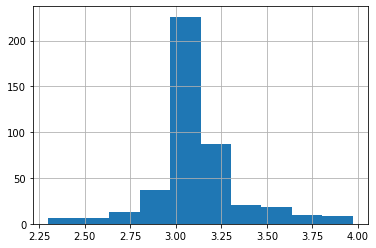

In [ ]:
ciclistas = ciclistas[(ciclistas["log_wage"] > 2.3) & (ciclistas["log_wage"] < 4)]
ciclistas["log_wage"].hist()

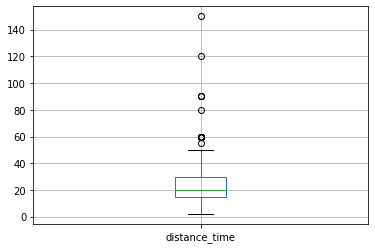

In [ ]:
ciclistas.boxplot(column="distance_time")

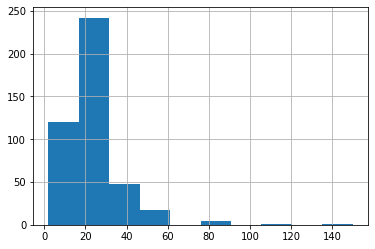

In [ ]:
ciclistas["distance_time"].hist()

In [ ]:
# Removendo outlier (tempo muito pequeno e muito grande)

ciclistas = ciclistas[(ciclistas["distance_time"].apply(np.log10) > 0.5) & (ciclistas["distance_time"] < 100.0)]

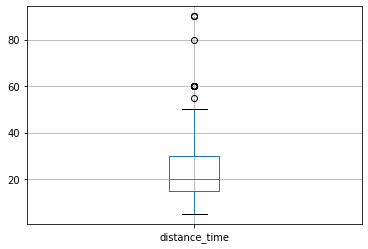

In [ ]:
ciclistas.boxplot(column="distance_time")

In [ ]:
ciclistas["wage_standard"].describe()

count     430.000000
mean     1530.360465
std      1267.436422
min       200.000000
25%       940.000000
50%      1100.000000
75%      1500.000000
max      9370.000000
Name: wage_standard, dtype: float64

In [ ]:
ciclistas["wage_standard"].var()

1606395.0842142354

In [ ]:
ciclistas["wage_standard"].mode()

0    1200
dtype: int64

In [ ]:
ciclistas["distance_time"].describe()

count    430.000000
mean      24.813953
std       13.074568
min        5.000000
25%       15.000000
50%       20.000000
75%       30.000000
max       90.000000
Name: distance_time, dtype: float64

In [ ]:
ciclistas["distance_time"].var()

170.94432699083862

In [ ]:
ciclistas["distance_time"].mode()

0    20.0
1    30.0
dtype: float64

In [ ]:
ciclistas.groupby(["gender"]).count()

,age,biggest_issue,biggest_need,distance_time,motivation_to_continue,motivation_to_start,neighborhood_living,wage_standard,log_wage
gender,,,,,,,,,
Feminino,81,81,81,81,81,81,81,81,81
Masculino,348,348,348,348,348,348,348,348,348
Outro,1,1,1,1,1,1,1,1,1


In [ ]:
# 4.3 vezes mais ciclistas homens do que mulheres, embora haja mais mulheres que
# homens na cidade do Recife. O que depreendemos disso? Segurança?

(ciclistas[ciclistas["gender"] == "Masculino"]["gender"].count())/(ciclistas[ciclistas["gender"] == "Feminino"]["gender"].count())

4.296296296296297

In [ ]:
# Razão

ciclistas[ciclistas["gender"]=="Feminino"].groupby(["biggest_issue"]).count()

,age,biggest_need,distance_time,gender,motivation_to_continue,motivation_to_start,neighborhood_living,wage_standard,log_wage
biggest_issue,,,,,,,,,
"Falta de infraestrutura adequada (ciclovias, bicicletários, etc.)",28,28,28,28,28,28,28,28,28
Falta de segurança no trânsito,40,40,40,40,40,40,40,40,40
Falta de segurança pública,7,7,7,7,7,7,7,7,7
Falta de sinalização,5,5,5,5,5,5,5,5,5
Outros,1,1,1,1,1,1,1,1,1
Sem resposta,0,0,0,0,0,0,0,0,0


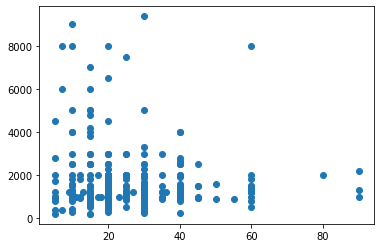

In [ ]:
# Dá para perceber que, de maneira geral, o salário vai abaixando
# à medida que o tempo de deslocamento vai aumentando.

plt.scatter(ciclistas["distance_time"], ciclistas["wage_standard"])

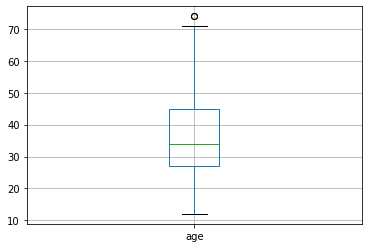

In [ ]:
ciclistas.boxplot(column="age")

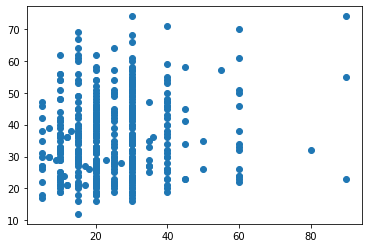

In [ ]:
plt.scatter(ciclistas["distance_time"], ciclistas["age"])

In [ ]:
# Isso se sustenta ao observar a covariância negativa entre os dois

ciclistas.drop(["log_wage"], axis=1).cov()

,age,distance_time,wage_standard
age,152.044452,23.652030,1.632335e+03
distance_time,23.652030,170.944327,-8.808302e+02
wage_standard,1632.335176,-880.830216,1.606395e+06


In [ ]:
ciclistas.drop(["log_wage"], axis=1).corr(method="pearson")

,age,distance_time,wage_standard
age,1.000000,0.146709,0.104447
distance_time,0.146709,1.000000,-0.053154
wage_standard,0.104447,-0.053154,1.000000


In [ ]:
ciclistas.drop(["log_wage"], axis=1).corr(method="spearman")

,age,distance_time,wage_standard
age,1.000000,0.125823,0.111393
distance_time,0.125823,1.000000,0.005853
wage_standard,0.111393,0.005853,1.000000
